# US-Ignite Fed_Notebook

# Data from 2009-2016

In [98]:
#import libraries from Carto.
from cartoframes.auth import set_default_credentials
from cartoframes.viz import Map, Layer
import cartoframes
cartoframes.__version__
#from cartoframes.viz.helpers import color_continuous_layer
import pandas as pd
import geopandas as gpd
import requests
import json
from autocensus import Query #Library from Socrata to gather ACS Data
from cartoframes.data.services import Geocoding
#import censusdata
#set_default_credentials('creds_usignite.json')
set_default_credentials(
    base_url='https://usignite-admin.carto.com/',
    api_key='81c922dc336bd82103d92a768816a4567c444909'
)

from cartoframes.data.observatory import Catalog, Variable, Geography, Dataset

In [99]:
import numpy as np

from linearmodels import PanelOLS
from linearmodels import RandomEffects
import ipywidgets as widgets
from ipywidgets import Output, Tab
from IPython.display import clear_output
from cartoframes.data.services import Isolines
from cartoframes.data.observatory import Variable
from cartoframes.data.observatory import Enrichment
from cartoframes.data.observatory import Catalog

# EDA

In [100]:
import seaborn as sns

In [101]:
df_final=pd.read_csv("~/Downloads/Final_merged.csv")

In [102]:
df_final.head()

,Unnamed: 0,geo_id,pop,centroid,year,geometry,edut,collegemale,collegefemale,households,income,gini,total_p,ratio_65,zipcode,geoid,NAICS2012,Empratio,estabratio
0,509,6073015502,208.0,POINT (-116.8304254797509 32.81131603277056),2010,MULTIPOLYGON (((-116.8583888559341 32.81723278...,1651.0,130.0,107.0,83.0,864.0,0.4400,2748,0.108806,91901,6073015502,0,39.686888,2.360078
1,509,6073015502,234.0,POINT (-116.8304254797509 32.81131603277056),2011,MULTIPOLYGON (((-116.8583888559341 32.81723278...,1717.0,124.0,114.0,95.0,896.0,0.4080,2748,0.108806,91901,6073015502,0,41.095890,2.383562
2,509,6073015502,291.0,POINT (-116.8304254797509 32.81131603277056),2012,MULTIPOLYGON (((-116.8583888559341 32.81723278...,1790.0,124.0,107.0,113.0,904.0,0.3790,2748,0.108806,91901,6073015502,0,0.293542,0.029354
3,509,6073015502,365.0,POINT (-116.8304254797509 32.81131603277056),2013,MULTIPOLYGON (((-116.8583888559341 32.81723278...,1900.0,141.0,148.0,136.0,903.0,0.3782,2748,0.108806,91901,6073015502,0,0.176125,0.017613
4,509,6073015502,411.0,POINT (-116.8304645225708 32.81130364624261),2014,MULTIPOLYGON (((-116.8583888559341 32.81723278...,1865.0,143.0,135.0,154.0,883.0,0.3837,2748,0.108806,91901,6073015502,0,0.234834,0.023483


In [103]:
df_final['NAICS2012'].unique()

array([ 0, 51, 11, 21])

In [104]:
data=df_final[['zipcode', 'geoid', 'NAICS2012', 'year', 'edut',
       'collegemale', 'collegefemale','pop',
       'households', 'income', 'gini', 'total_p', 'ratio_65', 'Empratio',
       'estabratio']]

In [105]:
data['total_college']=data['collegemale']+data['collegefemale']
data['college_ratio']=data['total_college']/data['edut']

/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [106]:
data['Empratio'][data['Empratio']!=0.0].sort_values()

1525         0.023095
1532         0.023095
1521         0.023095
1528         0.023095
2628         0.039139
2629         0.039139
2613         0.039139
2614         0.039139
2627         0.039139
2622         0.039139
2621         0.039139
2620         0.039139
2615         0.039139
18876        0.045767
18883        0.045767
1524         0.046189
1523         0.046189
1531         0.046189
1530         0.046189
2616         0.048924
2623         0.048924
2630         0.048924
2624         0.058708
2631         0.058708
2617         0.058708
15220        0.063559
15227        0.063559
13171        0.068729
13178        0.068729
13185        0.068729
             ...     
13741    35945.888424
13749    37265.324965
13735    37265.324965
13742    37265.324965
11830    38173.436926
11823    38173.436926
11816    38173.436926
11809    38173.436926
11810    38621.870321
11824    38621.870321
11817    38621.870321
11831    38621.870321
14533    40095.688002
14554    40095.688002
14540    4

In [107]:
data['Empratio'].describe() 

count    18928.000000
mean       531.719674
std       2483.383779
min          0.000000
25%          1.937632
50%         15.930630
75%        126.952959
max      54823.400890
Name: Empratio, dtype: float64

In [108]:
data['Empratio'].sort_values()

9463         0.000000
1600         0.000000
1599         0.000000
1598         0.000000
1597         0.000000
1596         0.000000
9184         0.000000
9185         0.000000
9186         0.000000
9187         0.000000
9188         0.000000
9189         0.000000
9190         0.000000
9191         0.000000
1601         0.000000
9192         0.000000
9194         0.000000
9195         0.000000
9196         0.000000
9197         0.000000
9198         0.000000
9199         0.000000
9200         0.000000
9201         0.000000
9202         0.000000
9203         0.000000
9204         0.000000
9352         0.000000
9353         0.000000
9193         0.000000
             ...     
13734    35945.888424
13749    37265.324965
13735    37265.324965
13742    37265.324965
11809    38173.436926
11816    38173.436926
11823    38173.436926
11830    38173.436926
11810    38621.870321
11831    38621.870321
11824    38621.870321
11817    38621.870321
14540    40095.688002
14533    40095.688002
14554    4

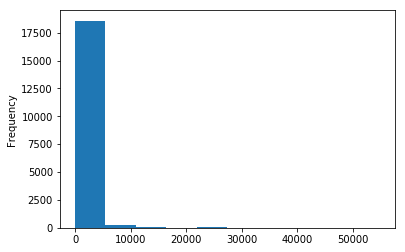

In [109]:
data['Empratio'].plot(kind ="hist")

In [110]:
data['estabratio'].describe() 

count    18928.000000
mean        25.384300
std        101.526305
min          0.000000
25%          0.119720
50%          0.846965
75%          5.670561
max       1737.422130
Name: estabratio, dtype: float64

In [111]:
data['logesration']=np.log(data['estabratio'])

/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


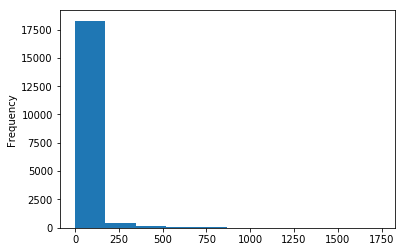

In [112]:
data['estabratio'].plot(kind ="hist")

In [113]:
loges=np.log(data['estabratio'])

/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [114]:
data['gini'].describe() 

count    18759.000000
mean         0.408813
std          0.061328
min          0.012800
25%          0.368600
50%          0.404900
75%          0.446000
max          0.722600
Name: gini, dtype: float64

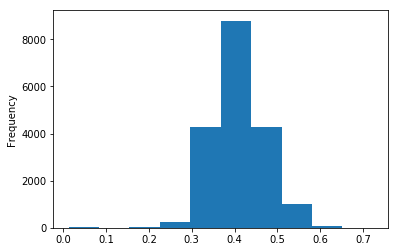

In [115]:
data['gini'].plot(kind ="hist") 

In [116]:
corr=data.corr().abs()

#upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
#to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]


[Text(0.5, 0, 'zipcode'),
 Text(1.5, 0, 'geoid'),
 Text(2.5, 0, 'NAICS2012'),
 Text(3.5, 0, 'year'),
 Text(4.5, 0, 'edut'),
 Text(5.5, 0, 'collegemale'),
 Text(6.5, 0, 'collegefemale'),
 Text(7.5, 0, 'pop'),
 Text(8.5, 0, 'households'),
 Text(9.5, 0, 'income'),
 Text(10.5, 0, 'gini'),
 Text(11.5, 0, 'total_p'),
 Text(12.5, 0, 'ratio_65'),
 Text(13.5, 0, 'Empratio'),
 Text(14.5, 0, 'estabratio'),
 Text(15.5, 0, 'total_college'),
 Text(16.5, 0, 'college_ratio'),
 Text(17.5, 0, 'logesration')]

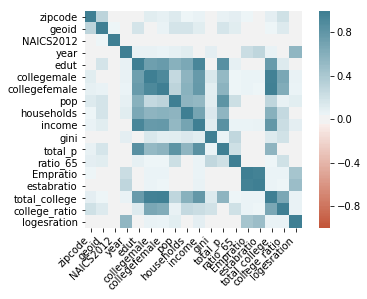

In [118]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

# modeling 

In [258]:
df=data

In [259]:
df.columns

Index(['zipcode', 'geoid', 'NAICS2012', 'year', 'edut', 'collegemale',
       'collegefemale', 'pop', 'households', 'income', 'gini', 'total_p',
       'ratio_65', 'Empratio', 'estabratio', 'total_college', 'college_ratio',
       'logesration'],
      dtype='object')

In [260]:
df.head()

,zipcode,geoid,NAICS2012,year,edut,collegemale,collegefemale,pop,households,income,gini,total_p,ratio_65,Empratio,estabratio,total_college,college_ratio,logesration
0,91901,6073015502,0,2010,1651.0,130.0,107.0,208.0,83.0,864.0,0.4400,2748,0.108806,39.686888,2.360078,237.0,0.143549,0.858695
1,91901,6073015502,0,2011,1717.0,124.0,114.0,234.0,95.0,896.0,0.4080,2748,0.108806,41.095890,2.383562,238.0,0.138614,0.868596
2,91901,6073015502,0,2012,1790.0,124.0,107.0,291.0,113.0,904.0,0.3790,2748,0.108806,0.293542,0.029354,231.0,0.129050,-3.528319
3,91901,6073015502,0,2013,1900.0,141.0,148.0,365.0,136.0,903.0,0.3782,2748,0.108806,0.176125,0.017613,289.0,0.152105,-4.039145
4,91901,6073015502,0,2014,1865.0,143.0,135.0,411.0,154.0,883.0,0.3837,2748,0.108806,0.234834,0.023483,278.0,0.149062,-3.751463


In [261]:
from linearmodels.panel import PooledOLS
import statsmodels.api as sm

In [262]:
df['year'] = pd.to_datetime(df['year'], format='%Y')

/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [263]:
df['year']=df['year'].dt.year

/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [264]:
#add column year to index
df=df.set_index([ 'zipcode','year'])
#swap indexes




In [265]:
import statsmodels.formula.api as smf

In [266]:
df.columns

Index(['geoid', 'NAICS2012', 'edut', 'collegemale', 'collegefemale', 'pop',
       'households', 'income', 'gini', 'total_p', 'ratio_65', 'Empratio',
       'estabratio', 'total_college', 'college_ratio', 'logesration'],
      dtype='object')

In [267]:
FE_ols1 = smf.ols(formula= 'estabratio ~ 1 +pop+households+income+ratio_65+edut+total_college', data = df).fit()
print(FE_ols1.summary())

                            OLS Regression Results                            
Dep. Variable:             estabratio   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     56.20
Date:                Tue, 25 Feb 2020   Prob (F-statistic):           3.75e-69
Time:                        15:50:10   Log-Likelihood:            -1.1372e+05
No. Observations:               18853   AIC:                         2.275e+05
Df Residuals:                   18846   BIC:                         2.275e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        23.6775      2.766      8.559

In [268]:
FE_ols2 = smf.ols(formula= 'estabratio ~ 1 +pop+households+income+ratio_65+edut+college_ratio', data = df).fit()
print(FE_ols2.summary())

                            OLS Regression Results                            
Dep. Variable:             estabratio   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     56.11
Date:                Tue, 25 Feb 2020   Prob (F-statistic):           4.83e-69
Time:                        15:50:10   Log-Likelihood:            -1.1350e+05
No. Observations:               18812   AIC:                         2.270e+05
Df Residuals:                   18805   BIC:                         2.271e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        24.0256      2.853      8.422

In [269]:
FE_ols3 = smf.ols(formula= 'estabratio ~ 1 +pop+households+income+ratio_65+edut', data = df).fit()
print(FE_ols3.summary())

                            OLS Regression Results                            
Dep. Variable:             estabratio   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     67.42
Date:                Tue, 25 Feb 2020   Prob (F-statistic):           4.50e-70
Time:                        15:50:11   Log-Likelihood:            -1.1372e+05
No. Observations:               18853   AIC:                         2.275e+05
Df Residuals:                   18847   BIC:                         2.275e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.8631      2.684      8.889      0.0

In [270]:
FE_olsfinal = smf.ols(formula= 'estabratio ~ 1 +pop+income+ratio_65+edut', data = df).fit()
print(FE_olsfinal.summary())

                            OLS Regression Results                            
Dep. Variable:             estabratio   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     83.41
Date:                Tue, 25 Feb 2020   Prob (F-statistic):           2.53e-70
Time:                        15:50:12   Log-Likelihood:            -1.1373e+05
No. Observations:               18853   AIC:                         2.275e+05
Df Residuals:                   18848   BIC:                         2.275e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.5308      2.266     11.711      0.0

In [271]:
import numpy as np
import pandas as pd
import libpysal as ps
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import compare_surfaces, truncate_colormap
import geopandas as gp
import matplotlib.pyplot as plt
import matplotlib as mpl

In [272]:
df.columns

Index(['geoid', 'NAICS2012', 'edut', 'collegemale', 'collegefemale', 'pop',
       'households', 'income', 'gini', 'total_p', 'ratio_65', 'Empratio',
       'estabratio', 'total_college', 'college_ratio', 'logesration'],
      dtype='object')

In [273]:

year = pd.to_datetime(data['year'], format='%Y')

In [274]:

year = pd.Categorical(year)

In [275]:
df['year'] = year

In [276]:
df['year']=df['year'].apply(lambda x: x.strftime('%Y') )

In [277]:
df.dropna(inplace=True)

In [278]:

exog_vars = ['pop','income','ratio_65','edut','year']
exog = sm.add_constant(df[exog_vars])

In [279]:
df.isnull().values.any()
df.isnull().sum()

geoid            0
NAICS2012        0
edut             0
collegemale      0
collegefemale    0
pop              0
households       0
income           0
gini             0
total_p          0
ratio_65         0
Empratio         0
estabratio       0
total_college    0
college_ratio    0
logesration      0
year             0
dtype: int64

In [280]:
from linearmodels.panel import RandomEffects
mod = RandomEffects(df.estabratio , exog)


In [282]:
re_res = mod.fit()
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:             estabratio   R-squared:                        0.1499
Estimator:              RandomEffects   R-squared (Between):              0.0020
No. Observations:               18728   R-squared (Within):               0.1501
Date:                Tue, Feb 25 2020   R-squared (Overall):              0.1467
Time:                        15:50:48   Log-likelihood                -1.113e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      330.07
Entities:                          85   P-value                           0.0000
Avg Obs:                       220.33   Distribution:                F(10,18717)
Min Obs:                       7.0000                                           
Max Obs:                       504.00   F-statistic (robust):             329.13
                            

In [283]:

exog_vars1 = ['pop','income','ratio_65','edut']
exog1 = sm.add_constant(df[exog_vars1])

In [284]:
FE_olsfinal = smf.ols(formula= 'estabratio ~ 1 +pop+income+ratio_65+edut', data = df).fit()
print(FE_olsfinal.summary())

                            OLS Regression Results                            
Dep. Variable:             estabratio   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     82.33
Date:                Tue, 25 Feb 2020   Prob (F-statistic):           2.10e-69
Time:                        15:50:52   Log-Likelihood:            -1.1303e+05
No. Observations:               18728   AIC:                         2.261e+05
Df Residuals:                   18723   BIC:                         2.261e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.5526      2.360     11.677      0.0

In [285]:
mod2 = PanelOLS(df.estabratio, exog1, entity_effects=True, time_effects=True)
fe_te_res = mod2.fit()
print(fe_te_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:             estabratio   R-squared:                        0.0085
Estimator:                   PanelOLS   R-squared (Between):             -0.0128
No. Observations:               18728   R-squared (Within):               0.0116
Date:                Tue, Feb 25 2020   R-squared (Overall):              0.0145
Time:                        15:50:53   Log-likelihood                -1.112e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      39.943
Entities:                          85   P-value                           0.0000
Avg Obs:                       220.33   Distribution:                 F(4,18633)
Min Obs:                       7.0000                                           
Max Obs:                       504.00   F-statistic (robust):             39.943
                            

In [286]:
from linearmodels.panel import compare
print(compare({'RE':re_res,'Pooled':fe_te_res}))

                    Model Comparison                    
                                       RE         Pooled
--------------------------------------------------------
Dep. Variable                  estabratio     estabratio
Estimator                   RandomEffects       PanelOLS
No. Observations                    18728          18728
Cov. Est.                      Unadjusted     Unadjusted
R-squared                          0.1499         0.0085
R-Squared (Within)                 0.1501         0.0116
R-Squared (Between)                0.0020        -0.0128
R-Squared (Overall)                0.1467         0.0145
F-statistic                        330.07         39.943
P-value (F-stat)                   0.0000         0.0000
=====================     ===============   ============
const                              81.965         21.526
                                 (18.982)       (8.5249)
pop                               -0.0192        -0.0168
                               